<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=255068779" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 551.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 36.5 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is 

In [4]:
# Update to compatible versions
!pip install autogluon==1.1.1 xgboost==2.0.3
# Restart kernel after installation

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 27.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 29.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 12.6 MB/s  0:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 56.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML

In [6]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [7]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [8]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [9]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [11]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


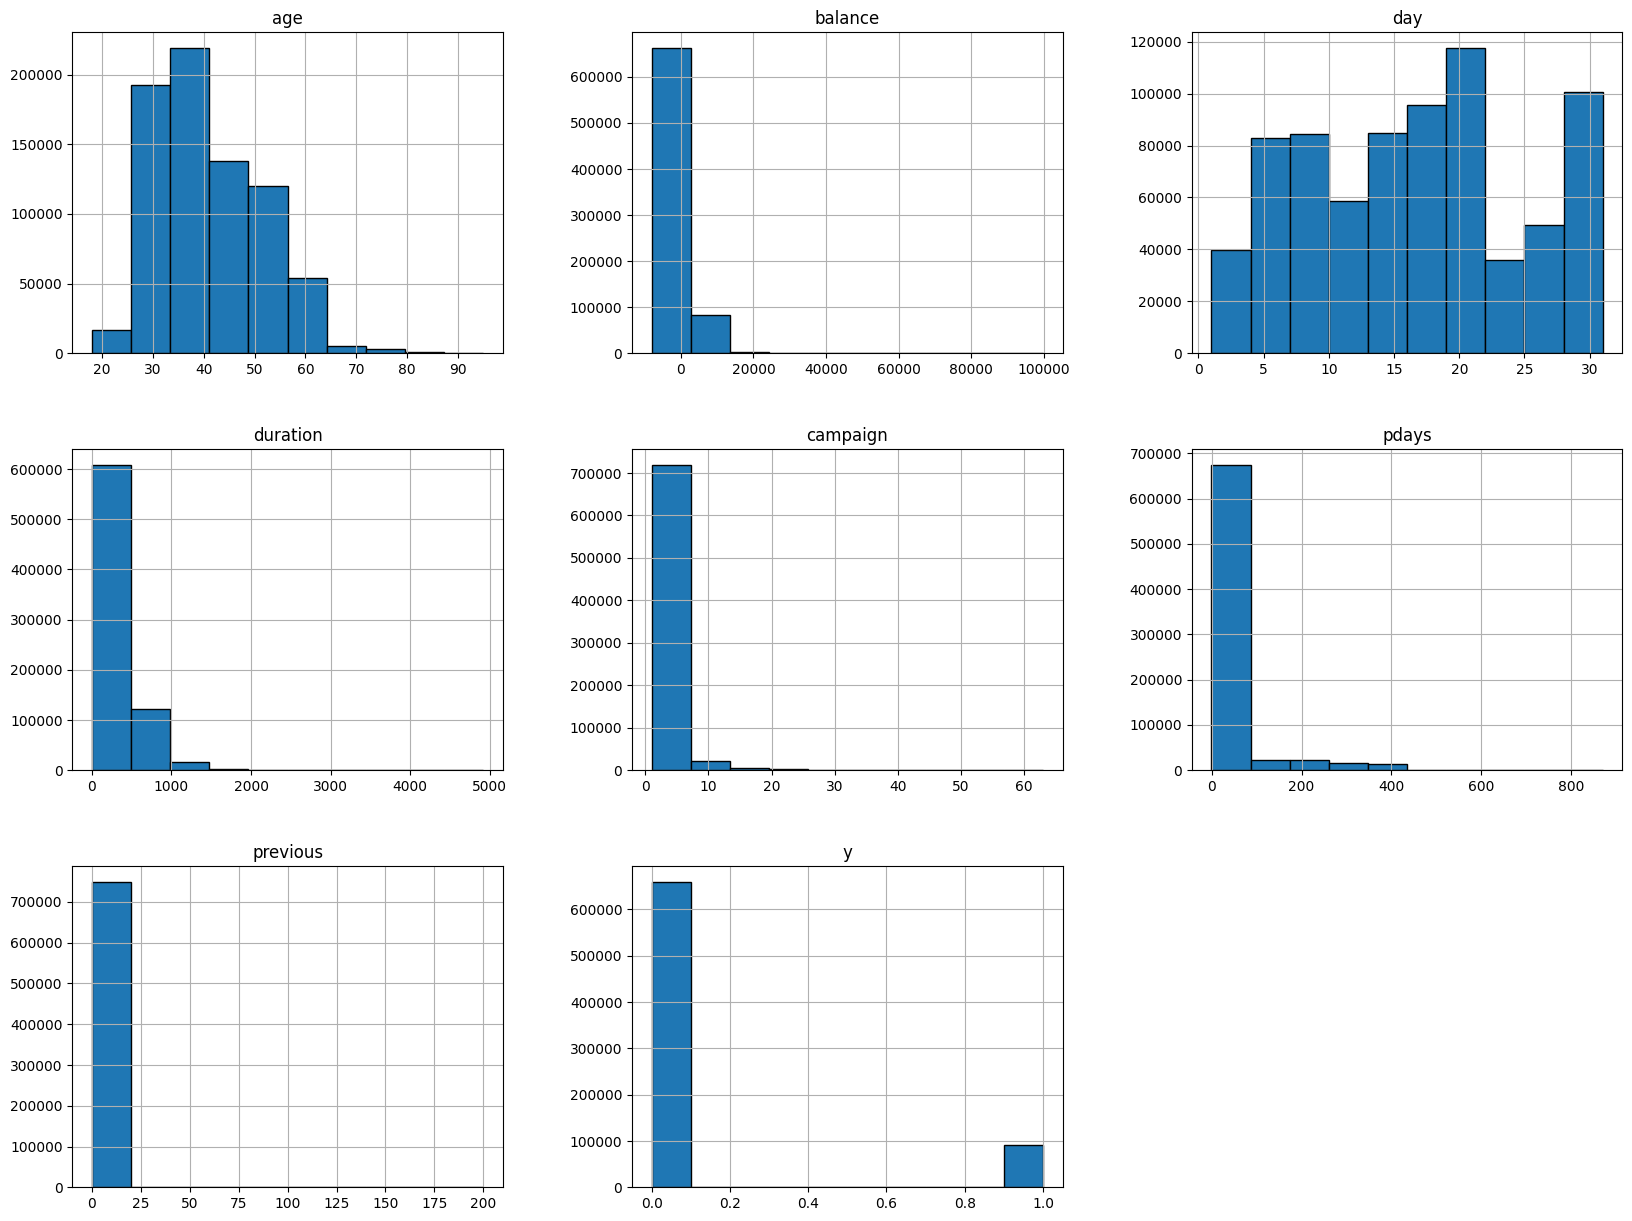

In [14]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [15]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [16]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [17]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [18]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [19]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [20]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [21]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,,,,,,,,,,
719955,4,2,1,1,1,1,1,2,3,1.393282,1.544369,-1.469099,0.049658,-0.213197,2.050319,2.012798
534584,10,1,1,1,1,1,1,9,1,1.294294,-0.424821,-0.620742,-0.526041,-0.581410,4.054356,1.267826
340048,2,2,2,1,2,2,1,1,1,-0.289515,-0.424821,-1.226711,-0.559043,-0.581410,4.041427,1.267826
120404,2,3,2,1,2,1,1,9,4,0.700366,-0.434345,0.227615,-0.467371,-0.581410,-0.302808,-0.222118
175557,5,2,3,1,2,1,3,9,4,0.898342,7.395152,0.470002,-0.661715,-0.581410,-0.302808,-0.222118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601445,7,2,3,1,1,1,1,9,4,0.007450,0.038995,-1.469099,1.743752,-0.581410,-0.302808,-0.222118
336942,10,3,2,1,2,1,3,9,4,0.106438,0.034762,1.560747,-0.584711,-0.581410,-0.302808,-0.222118
560484,7,1,2,1,1,2,1,6,4,1.393282,0.027002,1.439553,-0.742386,0.155017,-0.302808,-0.222118


Below we define a function to help us do stratified kfold cross validation which we use below

In [22]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## Neural Networks

In [23]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.019054606556892395, valley=0.0012022644514217973)

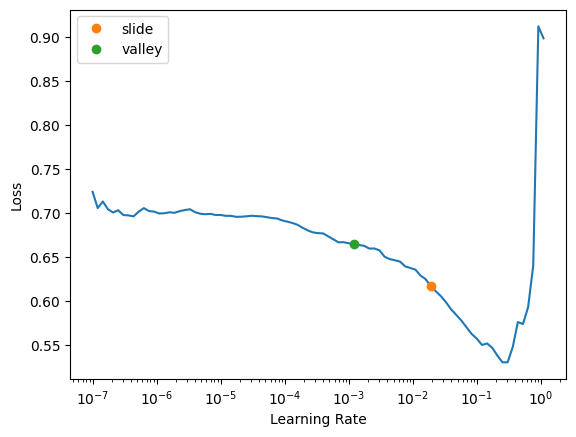

In [24]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [25]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.168391,0.163748,0.958798,01:34
1,0.165512,0.157370,0.961252,01:33


CPU times: user 3min 6s, sys: 1.4 s, total: 3min 7s
Wall time: 3min 8s


In [26]:
dl = test_dl

In [27]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [28]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [29]:
a_preds.shape

torch.Size([250000, 2])

In [30]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [31]:
nn_preds_x

tensor([[9.4781e-01, 5.2195e-02],
        [9.9236e-01, 7.6399e-03],
        [9.8506e-01, 1.4944e-02],
        ...,
        [9.9982e-01, 1.8391e-04],
        [9.9982e-01, 1.7580e-04],
        [9.0993e-01, 9.0070e-02]])

In [32]:
nn_preds_y

tensor([[9.9558e-01, 4.4220e-03],
        [7.2733e-01, 2.7267e-01],
        [9.9987e-01, 1.2946e-04],
        ...,
        [1.7276e-01, 8.2724e-01],
        [9.9806e-01, 1.9415e-03],
        [8.8932e-01, 1.1068e-01]])

In [33]:
a_preds

tensor([[9.9558e-01, 4.4220e-03],
        [7.2733e-01, 2.7267e-01],
        [9.9987e-01, 1.2946e-04],
        ...,
        [1.7276e-01, 8.2724e-01],
        [9.9806e-01, 1.9415e-03],
        [8.8932e-01, 1.1068e-01]])

In [34]:
nn_preds_proba

tensor([4.4220e-03, 2.7267e-01, 1.2946e-04,  ..., 8.2724e-01, 1.9415e-03,
        1.1068e-01])

In [35]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([4.4220e-03, 2.7267e-01, 1.2946e-04,  ..., 8.2724e-01, 1.9415e-03,
        1.1068e-01])

In [36]:
final_preds.shape

torch.Size([250000])

In [37]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.004422
750001,0.272667
750002,0.000129
750003,0.000089
750004,0.027168
...,...
999995,0.000068
999996,0.097720
999997,0.827244


## Decision Trees

### Random Forests

In [38]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 2min 30s, sys: 291 ms, total: 2min 31s
Wall time: 2min 31s


0.964758325774453

In [39]:
rf_preds_probs,rf_preds_probs.shape

(tensor([4.5965e-04, 2.1864e-01, 0.0000e+00,  ..., 6.7476e-01, 5.4458e-04,
         7.5538e-02]),
 torch.Size([250000]))

In [40]:
rf_preds_probs 

tensor([4.5965e-04, 2.1864e-01, 0.0000e+00,  ..., 6.7476e-01, 5.4458e-04,
        7.5538e-02])

In [41]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [42]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.461739
10,balance,0.097954
9,age,0.070706
7,month,0.068548
11,day,0.056673
8,poutcome,0.044952
4,housing,0.036276
14,pdays,0.035412
6,contact,0.028799
0,job,0.026082


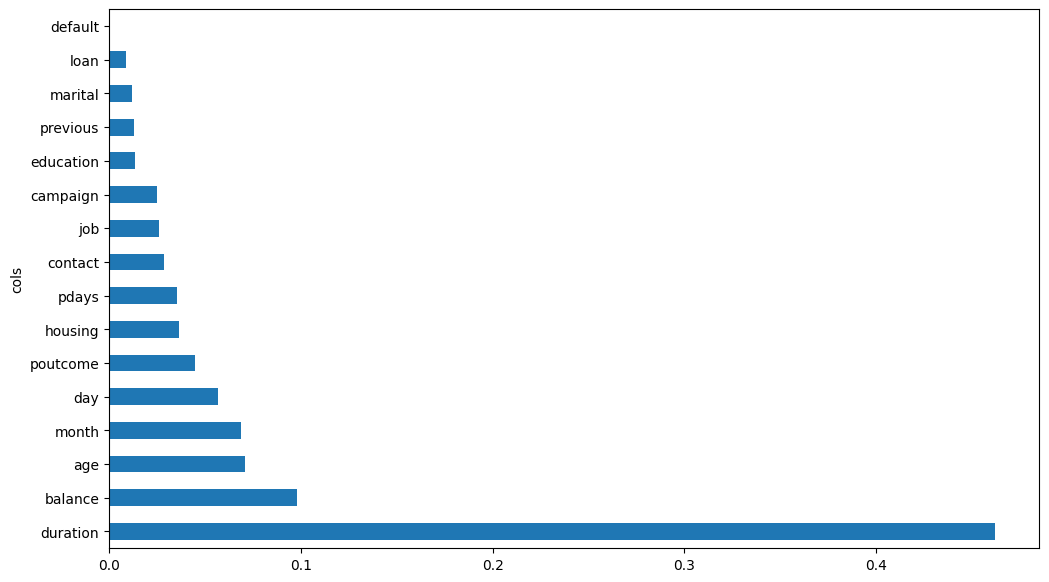

In [43]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [44]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

RandomForestClassifier(min_samples_leaf=3)

In [45]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.963106
Training fold 2/5...
Fold 2 roc_auc: 0.963917
Training fold 3/5...
Fold 3 roc_auc: 0.962832
Training fold 4/5...
Fold 4 roc_auc: 0.962591
Training fold 5/5...
Fold 5 roc_auc: 0.963919

Mean roc_auc: 0.963273


In [46]:
rf_oof_predictions.shape, rf_test_predictions.shape

((600000,), (150000,))

In [47]:
rf_oof_predictions

array([9.92500000e-01, 1.66666667e-03, 8.33333333e-03, ..., 1.57331655e-04, 0.00000000e+00, 1.41244314e-03])

In [48]:
rf_test_predictions

array([0.049745  , 0.0059442 , 0.03618834, ..., 0.00102067, 0.00531357, 0.10343772])

In [49]:
rf_mean_score, rf_fold_scores

(0.9632727788406481,
 [0.9631057650830199,
  0.9639166225141923,
  0.9628316872961348,
  0.9625911584433071,
  0.9639186608665868])

In [50]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000460
750001,0.218637
750002,0.000000
750003,0.000526
750004,0.030063
...,...
999995,0.000000
999996,0.167422
999997,0.674762


## Gradient Boosting

### XGBoost

In [51]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 9.5 s, sys: 83 ms, total: 9.58 s
Wall time: 4.88 s


0.9668996469667944

In [52]:
xgb_preds_proba

tensor([2.0258e-03, 6.2211e-02, 2.5266e-04,  ..., 8.9364e-01, 8.3805e-04,
        2.1084e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

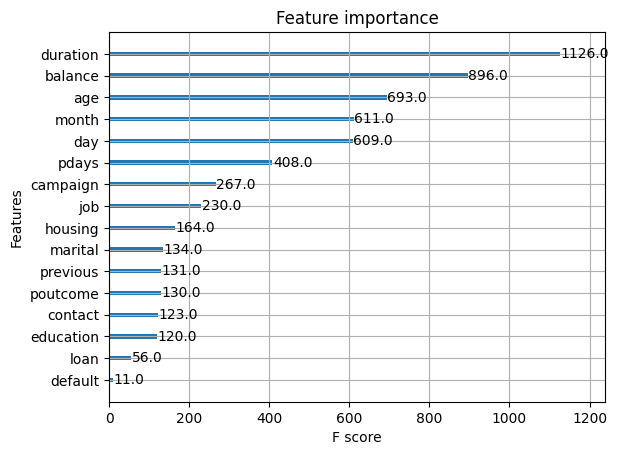

In [53]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [54]:
xgb_model = xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.965635
Training fold 2/5...
Fold 2 roc_auc: 0.965931
Training fold 3/5...
Fold 3 roc_auc: 0.965863
Training fold 4/5...
Fold 4 roc_auc: 0.965285
Training fold 5/5...
Fold 5 roc_auc: 0.966642

Mean roc_auc: 0.965871


In [56]:
xgb_oof_predictions

array([9.83161688e-01, 3.54644231e-04, 3.81886493e-04, ..., 5.86766437e-05, 1.12423586e-04, 8.54976941e-03])

In [57]:
xgb_test_predictions

array([0.05495996, 0.0045307 , 0.05194664, ..., 0.00015771, 0.00169908, 0.05377821])

In [58]:
xgb_mean_score

0.9658711000641504

In [59]:
 xgb_fold_scores

[0.9656351767997134,
 0.9659308737545387,
 0.9658627771527198,
 0.965284954120285,
 0.9666417184934958]

In [60]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002026
750001,0.062211
750002,0.000253
750003,0.000173
750004,0.021682
...,...
999995,0.000239
999996,0.056683
999997,0.893641


### LGBM

In [61]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72456, number of negative: 527544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120760 -> initscore=-1.985253
[LightGBM] [Info] Start training from score -1.985253
CPU times: user 13.2 s, sys: 121 ms, total: 13.4 s
Wall time: 6.84 s


0.965591923371074

In [62]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[0.9954, 0.0046],
         [0.8552, 0.1448],
         [0.9988, 0.0012],
         ...,
         [0.3352, 0.6648],
         [0.9984, 0.0016],
         [0.9074, 0.0926]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

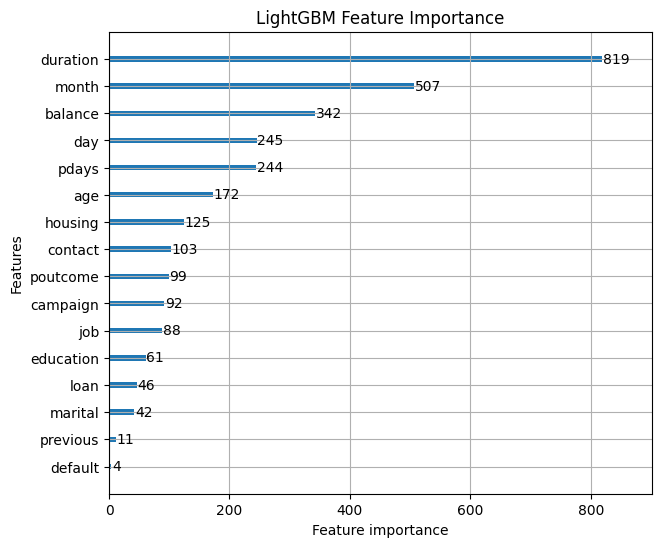

In [63]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [64]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

LGBMClassifier()

In [65]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 57964, number of negative: 422036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120758 -> initscore=-1.985268
[LightGBM] [Info] Start training from score -1.985268
Fold 1 roc_auc: 0.964497
Training fold 2/5...
[LightGBM] [Info] Number of positive: 57965, number of negative: 422035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points i

In [66]:
lgbm_oof_predictions

array([9.41000481e-01, 2.15639695e-03, 1.99620402e-03, ..., 4.37692268e-04, 2.88850070e-04, 2.78113993e-03])

In [67]:
lgbm_test_predictions

array([0.07763554, 0.00245266, 0.06148352, ..., 0.00031984, 0.0014624 , 0.09981924])

In [68]:
 lgbm_mean_score

0.9646720740911855

In [69]:
lgbm_fold_scores

[0.9644970790007033,
 0.9649012631420268,
 0.9640555450759382,
 0.9644048417598912,
 0.9655016414773675]

In [70]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.004571
750001,0.144827
750002,0.001233
750003,0.000530
750004,0.030231
...,...
999995,0.000386
999996,0.121777
999997,0.664803


### CatBoost

In [71]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 3min 57s, sys: 11.3 s, total: 4min 9s
Wall time: 1min 4s


0.9679596575588865

#### CatBoost Feature Importance

In [72]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   44.879022
7      month   10.588160
6    contact   10.540037
10   balance    7.596306
4    housing    5.962777
11       day    4.240933
9        age    2.659985
13  campaign    2.652559
8   poutcome    2.562798
14     pdays    2.262106


#### Cross validation - CatBoost

In [73]:
cat_model = CatBoostClassifier()
cat_model

In [74]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.143822
0:	learn: 0.4836988	total: 51.8ms	remaining: 51.8s
1:	learn: 0.3636635	total: 99.2ms	remaining: 49.5s
2:	learn: 0.2991499	total: 149ms	remaining: 49.6s
3:	learn: 0.2627071	total: 198ms	remaining: 49.3s
4:	learn: 0.2417075	total: 247ms	remaining: 49.2s
5:	learn: 0.2271096	total: 295ms	remaining: 48.9s
6:	learn: 0.2172215	total: 344ms	remaining: 48.9s
7:	learn: 0.2094778	total: 393ms	remaining: 48.7s
8:	learn: 0.2051402	total: 443ms	remaining: 48.8s
9:	learn: 0.2013230	total: 493ms	remaining: 48.8s
10:	learn: 0.1980395	total: 544ms	remaining: 48.9s
11:	learn: 0.1954677	total: 590ms	remaining: 48.6s
12:	learn: 0.1924757	total: 640ms	remaining: 48.6s
13:	learn: 0.1907424	total: 688ms	remaining: 48.5s
14:	learn: 0.1896241	total: 734ms	remaining: 48.2s
15:	learn: 0.1880403	total: 783ms	remaining: 48.1s
16:	learn: 0.1867684	total: 832ms	remaining: 48.1s
17:	learn: 0.1857577	total: 882ms	remaining: 48.1s
18:	learn: 0.1841758	total: 933ms	remai

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [75]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([2.4580e-03, 8.8822e-02, 2.6467e-04,  ..., 7.6617e-01, 7.3029e-04,
        1.6055e-01])

In [76]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([0.0572, 0.0025, 0.0551,  ..., 0.0002, 0.0012, 0.0412])

In [77]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.9681994399744107

#### CatBoost + LGBM

In [78]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([0.0037, 0.1301, 0.0008,  ..., 0.6517, 0.0011, 0.1014])

In [79]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [80]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9677968981227575

#### XGBoost + LGBM

In [81]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([3.2986e-03, 1.0352e-01, 7.4270e-04,  ..., 7.7922e-01, 1.2357e-03,
        1.5170e-01])

In [82]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9671356557133288

In [83]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003299
750001,0.103519
750002,0.000743
750003,0.000351
750004,0.025956
...,...
999995,0.000312
999996,0.089230
999997,0.779222


#### CatBoost + LGBM + XGBoost

In [84]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([3.1624e-03, 1.0749e-01, 5.8736e-04,  ..., 7.3238e-01, 1.0313e-03,
        1.3789e-01])

In [85]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9680101534942971

## AutoML

### AutoGluon

In [86]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
Time_limit = 3600*10
#Time_limit = 300
problem_type='binary'

In [87]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    #ag_args_fit={'num_gpus': 1}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250809_053318"
2025-08-09 05:33:18,393	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-09 05:33:21,298	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=1345) 	Ran out of time, early stopping on iteration 1043.
(_ray_fit pid=1482) 	Ran out of time, early stopping on iteration 1033. [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_ray_fit pid=1969) 	Ran out of time, stopping training early. (Stopping on epoch 10)
(_ray_fit pid=1544) 	Ran out of time, early stopping on iteration 1042. [repeated 3x across cluster]
(_dystack pid=413) Unhandled error (supp

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.970330     roc_auc     921.229609  25682.101245                0.127441          79.262516            3       True         25
1           CatBoost_BAG_L2   0.970044     roc_auc     831.611501  23815.778757                3.188187        6199.192250            2       True         19
2         LightGBMXT_BAG_L2   0.969966     roc_auc     877.088517  17896.556293               48.665202         279.969786            2       True         15
3           LightGBM_BAG_L2   0.969950     roc_auc     833.439575  17691.763098                5.016261          75.176591            2       True         16
4    NeuralNetFastAI_BAG_L2   0.969949     roc_auc     837.294214  18634.375999                8.870900        1017.789492            2       True  

In [88]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [89]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.970330     roc_auc     921.229609  25682.101245                0.127441          79.262516            3       True         25
1           CatBoost_BAG_L2   0.970044     roc_auc     831.611501  23815.778757                3.188187        6199.192250            2       True         19
2         LightGBMXT_BAG_L2   0.969966     roc_auc     877.088517  17896.556293               48.665202         279.969786            2       True         15
3           LightGBM_BAG_L2   0.969950     roc_auc     833.439575  17691.763098                5.016261          75.176591            2       True         16
4    NeuralNetFastAI_BAG_L2   0.969949     roc_auc     837.294214  18634.375999                8.870900        1017.789492            2       True  

In [90]:
%%time
predictor.leaderboard()

CPU times: user 5.39 ms, sys: 1.98 ms, total: 7.37 ms
Wall time: 6.8 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.970330,roc_auc,921.229609,25682.101245,0.127441,79.262516,3,True,25
1,CatBoost_BAG_L2,0.970044,roc_auc,831.611501,23815.778757,3.188187,6199.192250,2,True,19
2,LightGBMXT_BAG_L2,0.969966,roc_auc,877.088517,17896.556293,48.665202,279.969786,2,True,15
3,LightGBM_BAG_L2,0.969950,roc_auc,833.439575,17691.763098,5.016261,75.176591,2,True,16
4,NeuralNetFastAI_BAG_L2,0.969949,roc_auc,837.294214,18634.375999,8.870900,1017.789492,2,True,22
5,RandomForestEntr_BAG_L2,0.969652,roc_auc,855.361618,18030.710611,26.938303,414.124104,2,True,18
6,RandomForestGini_BAG_L2,0.969449,roc_auc,850.598816,17895.539837,22.175502,278.953330,2,True,17
7,ExtraTreesEntr_BAG_L2,0.969426,roc_auc,852.858210,17725.540293,24.434896,108.953786,2,True,21
8,XGBoost_BAG_L2,0.969286,roc_auc,832.949537,17853.942837,4.526222,237.356330,2,True,23
9,WeightedEnsemble_L2,0.969248,roc_auc,291.860938,13342.322412,0.131580,46.911977,2,True,14


In [91]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 28min 56s, sys: 8.28 s, total: 29min 4s
Wall time: 14min 15s


,0,1
id,,
750000,0.998891,0.001109
750001,0.905748,0.094252
750002,0.999803,0.000197
750003,0.999875,0.000125
750004,0.988044,0.011956


In [92]:
predictions = autogluon_preds_proba

In [93]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 29min 12s, sys: 8.21 s, total: 29min 20s
Wall time: 14min 23s


id
750000    0.001109
750001    0.094252
750002    0.000197
750003    0.000125
750004    0.011956
Name: y, dtype: float32

In [94]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [95]:
autogluon_preds_proba.values

array([1.1091840e-03, 9.4252080e-02, 1.9708890e-04, ..., 6.6525555e-01, 4.2575513e-04, 1.6270421e-01], dtype=float32)

In [96]:
!rm submission.csv
sub_df['y'] = autogluon_preds_proba.values
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001109
750001,0.094252
750002,0.000197
750003,0.000125
750004,0.011956
...,...
999995,0.000146
999996,0.087831
999997,0.665256


In [97]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [98]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [99]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.968199
7,CatBoost_XGB_LGBM_average,0.968010
3,CatBoost,0.967960
5,CatBoost_LGBM_average,0.967797
6,XGB_LGBM_average,0.967136
1,XGBoost,0.966900
2,LGBM,0.965592
0,Random Forest,0.964758
